<a href="https://colab.research.google.com/github/cufezhusy/deephedging/blob/main/notebooks/trainer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
!pip install cdxbasics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
! git clone https://github.com/cufezhusy/deephedging/

fatal: destination path 'deephedging' already exists and is not an empty directory.


In [11]:
"""
When working on the code base, activate below code:

import imp
import deephedging.base as base
imp.reload(base)
import deephedging.world as world
imp.reload(world)
import deephedging.agents as agents
imp.reload(agents)
import deephedging.objectives as objectives
imp.reload(objectives)
import deephedging.gym as gym
imp.reload(gym)
import deephedging.trainer as trainer
imp.reload(trainer)
"""

print("Deep Hedging AI says hello  ... ", end='')
from cdxbasics.config import Config
from deephedging.trainer import train
from deephedging.gym import VanillaDeepHedgingGym
from deephedging.world import SimpleWorld_Spot_ATM

from IPython.display import display, Markdown


Deep Hedging AI says hello  ... 

In [12]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))


Found GPU at: /device:GPU:0


In [13]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 3622523870358034101
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 40231960576
locality {
  bus_id: 1
  links {
  }
}
incarnation: 18309898662176060711
physical_device_desc: "device: 0, name: A100-SXM4-40GB, pci bus id: 0000:00:04.0, compute capability: 8.0"
xla_global_id: 416903419
]


In [14]:
from keras import backend as K
K._get_available_gpus()

['/device:GPU:0']

# Deep hedging

## Deep Hedging in Black \& Scholes World

Deep Hedging Engine: first of 400 epochs for 10000 samples (1000 validation samples) started. Compiling graph ...       


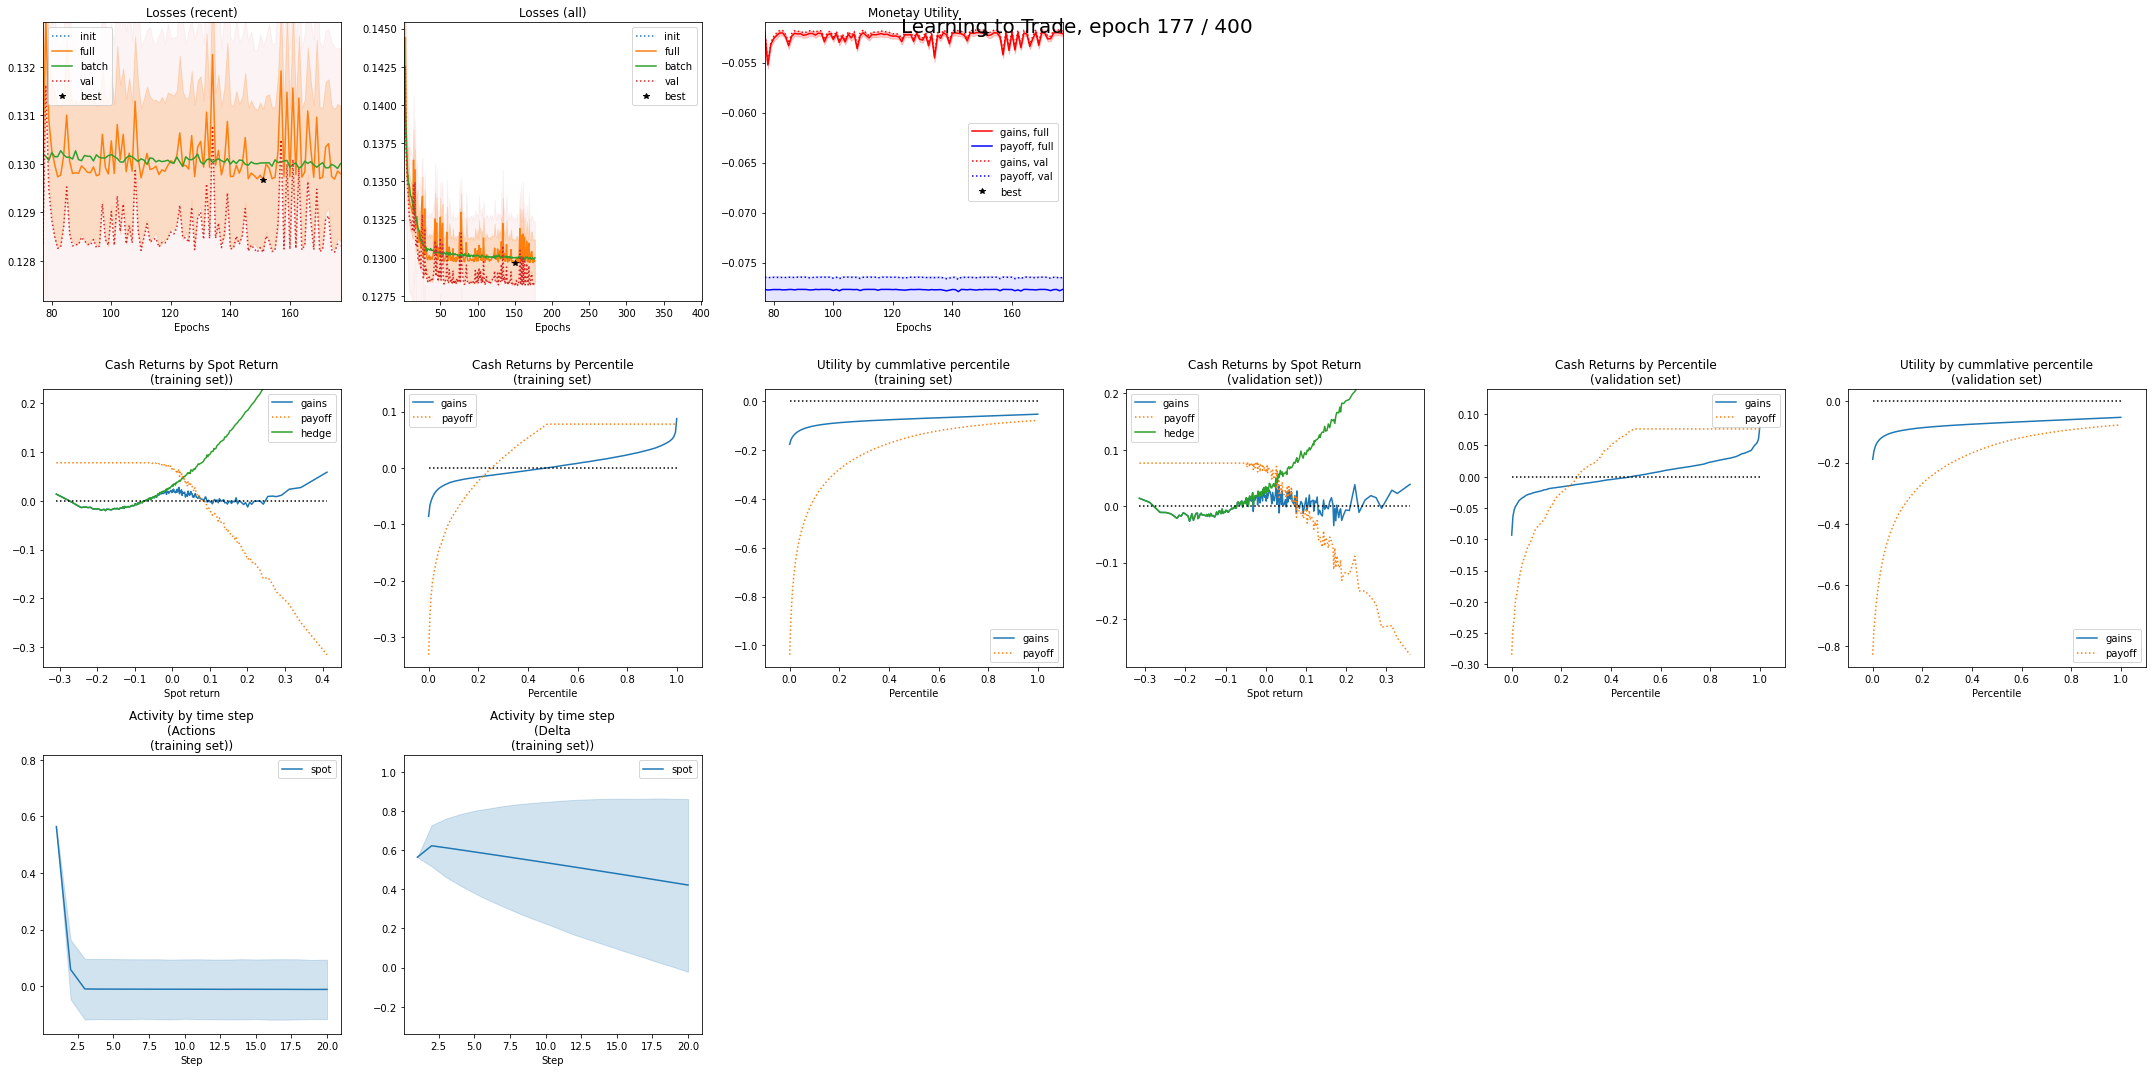

Training 177/400 epochs; 10000 samples; 1000 validation samples batch size 32 | initial loss 0.167046 (0.00248216), full 0.129798 (0.00139539), best 0.129675 (0.00248216), batch 0.130005, val 0.128306 (0.004074). Best epoch 150 | time elapsed 37:29; estimated time remaining 47:27                         
 Status: Aborted



KeyboardInterrupt: ignored

In [15]:

# see print of the config below for numerous options
config = Config()
# world
config.world.samples = 10000
config.world.steps = 20
config.world.black_scholes = True
config.world.drift = 0.0  # Mean drift of the asset; default: 0.1
config.world.strike = 0.0  # Relative strike. Set to zero to turn off option; default: 1.0
config.world.cost_p = 7.7  # Trading cost for the option on top of delta and vega cost; default: 0.0005
config.world.cost_s = 1 / 1000000.0  # Trading cost spot; default: 0.0002
config.world.cost_v = 7.7  # Trading cost vega; default: 0.02
# gym
config.gym.objective.utility = "exp2"
config.gym.objective.lmbda = 10.
config.gym.agent.network.depth = 3
config.gym.agent.network.activation = "softplus"
# trainer
config.trainer.train.batch_size = None
config.trainer.train.epochs = 400
config.trainer.train.run_eagerly = False
config.trainer.visual.epoch_refresh = 1
config.trainer.visual.time_refresh = 10
config.trainer.visual.confidence_pcnt_lo = 0.25
config.trainer.visual.confidence_pcnt_hi = 0.75

display(Markdown("## Deep Hedging in Black \& Scholes World"))

# create world
world  = SimpleWorld_Spot_ATM( config.world )
val_world  = world.clone(samples=1000)

# create training environment
gym = VanillaDeepHedgingGym( config.gym )

# create training environment
train( gym=gym, world=world, val_world=val_world, config=config.trainer )
r = gym(world.tf_data)
print("Keys of the dictionary returned by the gym: ", r.keys())

print("=========================================")
print("Config usage report")
print("=========================================")
print( config.usage_report() )
config.done()
